In [41]:
import requests
import urllib

def runQuery(query, start_year=1979,
             end_year=2015, corpus=26,
             smoothing=0):

    # converting a regular string to
    # the standard URL format
    # eg: "geeks for,geeks" will
    # convert to "geeks%20for%2Cgeeks"
    query = urllib.parse.quote(query)

    # creating the URL
    url = 'https://books.google.com/ngrams/json?content=' + query + '&year_start=' + str(start_year) + '&year_end=' + str(end_year) + '&corpus=' + str(corpus) + '&smoothing=' + str(smoothing) + ''

    # requesting data from the above url
    response = requests.get(url)

    # extracting the json data from the response we got
    output = response.json()

    # creating a list to store the ngram data
    return_data = []

    if len(output) == 0:
        # if no data returned from site,
        # print the following statement
        return "No data available for this Ngram."
    else:
        # if data returned from site,
        # store the data in return_data list
        for num in range(len(output)):

              # getting the name
            return_data.append((output[num]['ngram'],
                                # getting ngram data
                                output[num]['timeseries'])
                               )

    return return_data

query = "Albert Einstein"
print(runQuery(query))

[('Albert Einstein', [7.621325153195357e-07, 7.122557121874706e-07, 6.76329420912225e-07, 7.383187607956643e-07, 6.59217846532556e-07, 6.721215868310537e-07, 6.894903776810679e-07, 7.000328423600877e-07, 7.375231234618695e-07, 6.423524609999731e-07, 6.634352871515148e-07, 6.572675488314417e-07, 6.427757739402296e-07, 6.439823323489691e-07, 6.56605436688551e-07, 7.293330099855666e-07, 6.97883820066636e-07, 6.914626169418625e-07, 7.363811960203748e-07, 7.350793111982057e-07, 7.18511557806778e-07, 7.850784982110781e-07, 8.068159331742208e-07, 8.275762866105651e-07, 7.98838527771295e-07, 7.560403219031286e-07, 8.797590567155567e-07, 9.037142945089727e-07, 8.753138445172226e-07, 8.836749429974589e-07, 9.361879165226128e-07, 8.728600846552581e-07, 9.70076939665887e-07, 1.0528601706027985e-06, 9.337930464425881e-07, 8.729298315302003e-07, 8.7161703277161e-07])]


# Practice

Tasks:
- use list to store multiple query words and save it to a file (txt, pkl, csv, etc)
- get query words from the file and runQuery for them
- store the data into a dataframe, make time as rows and timeseries data for each query as a column
- get the average of the data for each time period
- make a line plot

Timeseries data by query:
      prejudice      bullying  addiction    trauma   average
year                                                        
1979   0.000013  3.194722e-07   0.000003  0.000006  0.000006
1980   0.000012  3.344686e-07   0.000003  0.000006  0.000006
1981   0.000013  3.562543e-07   0.000003  0.000006  0.000006
1982   0.000014  3.530836e-07   0.000003  0.000007  0.000006
1983   0.000012  3.719358e-07   0.000003  0.000007  0.000006
1984   0.000013  3.961315e-07   0.000003  0.000007  0.000006
1985   0.000014  3.992721e-07   0.000003  0.000008  0.000006
1986   0.000012  4.228311e-07   0.000003  0.000008  0.000006
1987   0.000013  4.197115e-07   0.000003  0.000008  0.000006
1988   0.000013  4.307313e-07   0.000004  0.000009  0.000006
1989   0.000012  5.887816e-07   0.000004  0.000009  0.000006
1990   0.000012  5.111432e-07   0.000004  0.000010  0.000007
1991   0.000013  5.686529e-07   0.000004  0.000009  0.000007
1992   0.000013  5.202605e-07   0.000004  0.000010  0.00000

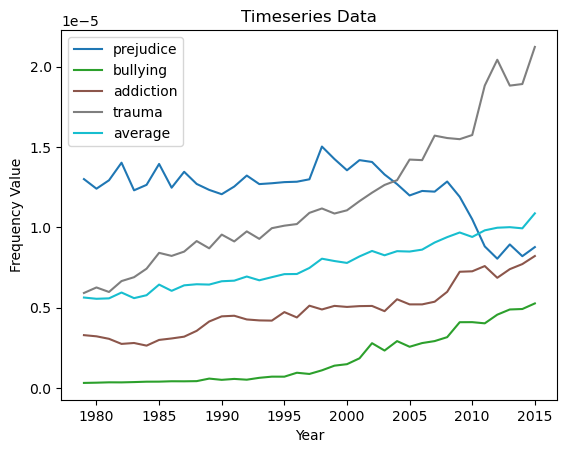

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Saving the query list to a text file
queries = ['prejudice', 'bullying', 'addiction', 'trauma']
filename = 'query_list.txt'

with open(filename, 'w') as file:
    for query in queries:
        file.write(query + '\n')

data = {}

# Retrieving query words from the file and running runQuery
with open(filename, 'r') as file:
    for line in file:
        query = line.strip()
        result = runQuery(query)
        data[query] = result[0][1]

# Create DataFrame from the data dictionary
df = pd.DataFrame(data)

# Add a new 'year' column
df['year'] = range(1979, 2016)

# Set 'year' as the index
df.set_index('year', inplace=True)

# Add average of the data for each time period
df['average'] = df.mean(axis=1)

# Display the DataFrame
print("Timeseries data by query:")
print(df)

# Line plot with different colors for each column
df.plot(kind='line', colormap='tab10')
plt.xlabel('Year')
plt.ylabel('Frequency Value')
plt.title('Timeseries Data')
plt.show()